In [1]:
#read in ipsilateral breast labelmap/volume
#mask this patient's breast
#generate histogram of intensity
#DIR to new patient's breast
#expand/dilate region (might need to be manual)
#mask new patient's breast
#generate histogram of intensity

In [2]:
#import modules
import SimpleITK as sitk

from platipy.imaging.visualisation.tools import ImageVisualiser
from platipy.imaging.utils.tools import get_com
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [3]:
R_breast=sitk.ReadImage("/home/alicja/Downloads/Segmentation.nii.gz")

In [4]:
WES_010_4_B50T=sitk.ReadImage("/home/alicja/Documents/WES_010/IMAGES/WES_010_4_20180829_MR_EP2D_DIFF_TRA_SPAIR_ZOOMIT_EZ_B50T_EP2D_DIFF_TRA_SPAIR_ZOOMIT_TRACEW_DFC_MIX_5.nii.gz")
WES_010_4_B800T=sitk.ReadImage("/home/alicja/Documents/WES_010/IMAGES/WES_010_4_20180829_MR_EP2D_DIFF_TRA_SPAIR_ZOOMIT_EZ_B800T_EP2D_DIFF_TRA_SPAIR_ZOOMIT_TRACEW_DFC_MIX_5.nii.gz")

In [5]:
masked_R_breast = sitk.Mask(WES_010_4_B50T, R_breast)

<IPython.core.display.Javascript object>


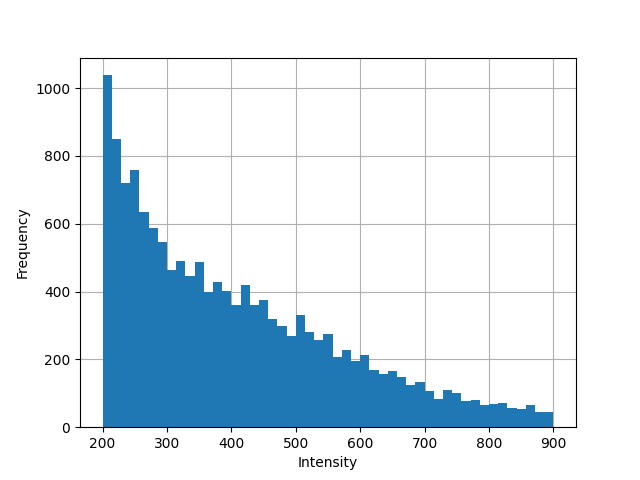

In [10]:
values = sitk.GetArrayViewFromImage(masked_R_breast).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(200,900,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()

In [7]:
#Use these values to do thresholding
def estimate_tumour_vol(img_mri, lowerthreshold=300, upperthreshold=3000, hole_size=1):
    label_threshold = sitk.BinaryThreshold(img_mri, lowerThreshold=lowerthreshold, upperThreshold=upperthreshold)
    label_threshold_cc = sitk.RelabelComponent(sitk.ConnectedComponent(label_threshold))
    label_threshold_cc_x = (label_threshold_cc==1)
    label_threshold_cc_x_f = sitk.BinaryMorphologicalClosing(label_threshold_cc_x, (hole_size,hole_size,hole_size))
    return(label_threshold_cc_x_f)

In [12]:
image_mri=WES_010_4_B50T
arr_mri = sitk.GetArrayFromImage(image_mri)
arr_mri[:,:,arr_mri.shape[2]//2:] = 0
image_mri_masked=sitk.GetImageFromArray(arr_mri)
image_mri_masked.CopyInformation(image_mri)

label_threshold_cc_x_f=estimate_tumour_vol(image_mri_masked, lowerthreshold=720, upperthreshold=3000, hole_size=1)

sitk.WriteImage(label_threshold_cc_x_f,"test_label_threshold_010_4_B50T_hist.nii.gz") #works well

In [35]:
np.max(label_threshold_cc_x_f)

0

<IPython.core.display.Javascript object>


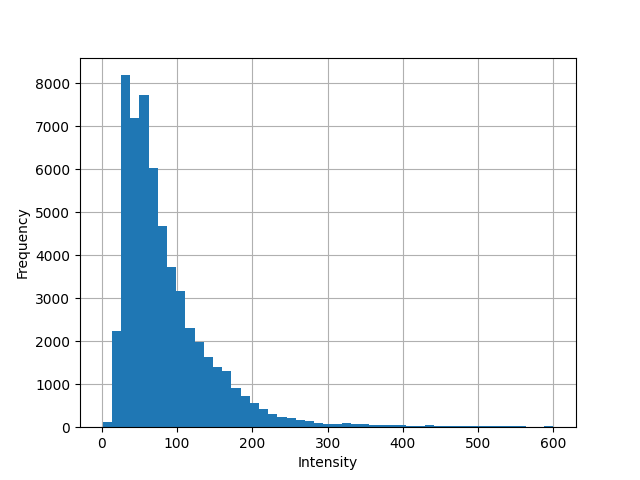

In [60]:
masked_R_breast_B800T = sitk.Mask(WES_010_4_B800T, R_breast)
values = sitk.GetArrayViewFromImage(masked_R_breast_B800T).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(1,600,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()

In [61]:
image_mri=WES_010_4_B800T
arr_mri = sitk.GetArrayFromImage(image_mri)
arr_mri[:,:,arr_mri.shape[2]//2:] = 0
image_mri_masked=sitk.GetImageFromArray(arr_mri)
image_mri_masked.CopyInformation(image_mri)

label_threshold_cc_x_f=estimate_tumour_vol(image_mri_masked, lowerthreshold=300, upperthreshold=3000, hole_size=1)

sitk.WriteImage(label_threshold_cc_x_f,"test_label_threshold_010_4_B800T_hist.nii.gz") #works super well

In [15]:
WES_010_4_T2w=sitk.ReadImage("/home/alicja/Documents/WES_010/IMAGES/WES_010_4_20180829_MR_T2_TSE_TRA_SPAIR_TSE2D1_11_T2_TSE_TRA_SPAIR_3.nii.gz")

<IPython.core.display.Javascript object>


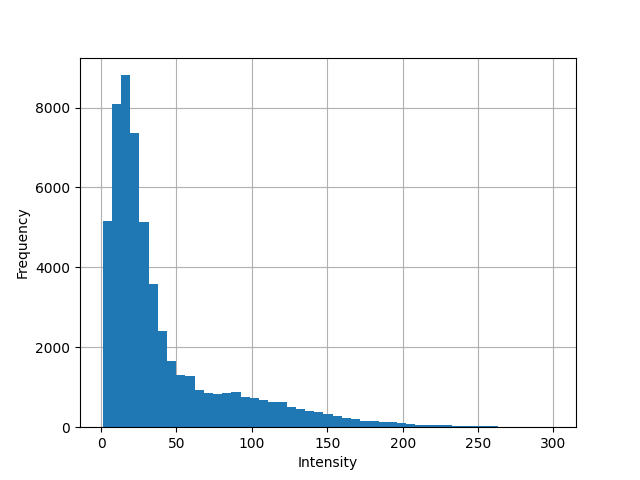

In [63]:
WES_010_4_T2w=sitk.Resample(WES_010_4_T2w, WES_010_4_B50T)
masked_R_breast_T2w = sitk.Mask(WES_010_4_T2w, R_breast)
values = sitk.GetArrayViewFromImage(masked_R_breast_T2w).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(1,300,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()

In [64]:
image_mri=WES_010_4_T2w
arr_mri = sitk.GetArrayFromImage(image_mri)
arr_mri[:,:,arr_mri.shape[2]//2:] = 0
image_mri_masked=sitk.GetImageFromArray(arr_mri)
image_mri_masked.CopyInformation(image_mri)

label_threshold_cc_x_f=estimate_tumour_vol(image_mri_masked, lowerthreshold=170, upperthreshold=3000, hole_size=1)

sitk.WriteImage(label_threshold_cc_x_f,"test_label_threshold_010_4_T2w_hist.nii.gz") #works well too

In [13]:
WES_010_4_MPE=sitk.ReadImage("MPE_sub_WES_010_4.nii.gz")

<IPython.core.display.Javascript object>


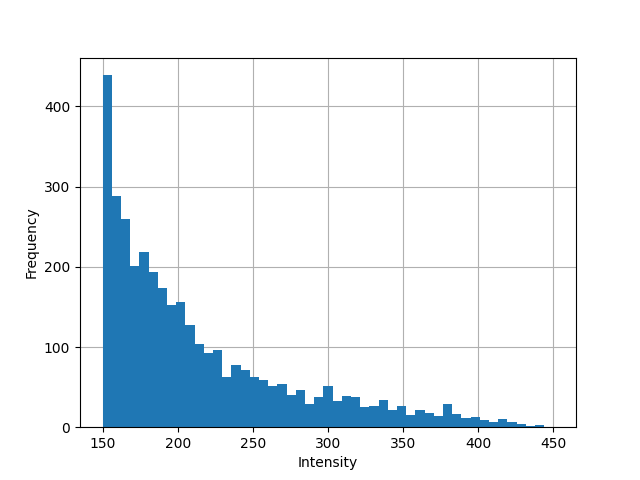

In [17]:
WES_010_4_MPE=sitk.Resample(WES_010_4_MPE, WES_010_4_B50T)
masked_R_breast_MPE = sitk.Mask(WES_010_4_MPE, R_breast)
values = sitk.GetArrayViewFromImage(masked_R_breast_MPE).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(150,450,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()

In [20]:
image_mri=WES_010_4_MPE
arr_mri = sitk.GetArrayFromImage(image_mri)
arr_mri[:,:,arr_mri.shape[2]//2:] = 0
image_mri_masked=sitk.GetImageFromArray(arr_mri)
image_mri_masked.CopyInformation(image_mri)

label_threshold_cc_x_f=estimate_tumour_vol(image_mri_masked, lowerthreshold=230, upperthreshold=3000, hole_size=1)

sitk.WriteImage(label_threshold_cc_x_f,"test_label_threshold_010_4_MPE_hist.nii.gz") #good

In [65]:
from platipy.imaging.visualisation.tools import ImageVisualiser

from platipy.imaging.registration.registration import (
    initial_registration,
    fast_symmetric_forces_demons_registration,
    transform_propagation,
    apply_field
)

In [66]:
#DIR to Patient 8
WES_008_4_B50T=sitk.ReadImage("/home/alicja/Documents/WES_008/IMAGES/WES_008_4_20180619_MR_EP2D_DIFF_TRA_SPAIR_ZOOMIT_EZ_B50T_EP2D_DIFF_TRA_SPAIR_ZOOMIT_TRACEW_DFC_MIX_5.nii.gz")
image_to_0_rigid, tfm_to_0_rigid = initial_registration(
    WES_008_4_B50T,
    WES_010_4_B50T,
    options={
        'shrink_factors': [8,4],
        'smooth_sigmas': [0,0],
        'sampling_rate': 0.5,
        'final_interp': 2,
        'metric': 'mean_squares',
        'optimiser': 'gradient_descent_line_search',
        'number_of_iterations': 25},
    reg_method='Rigid')

image_to_0_dir, tfm_to_0_dir = fast_symmetric_forces_demons_registration(
    WES_008_4_B50T,
    image_to_0_rigid,
    resolution_staging=[4,2],
    iteration_staging=[10,10]
)

R_breast_to_0_rigid = transform_propagation(
    WES_008_4_B50T,
    R_breast,
    tfm_to_0_rigid,
    structure=True
)

R_breast_to_0_dir = apply_field(
    R_breast_to_0_rigid,
    tfm_to_0_dir,
    structure=True
)

You have selected a single axis and multiple slice locations, attempting to match.


<IPython.core.display.Javascript object>


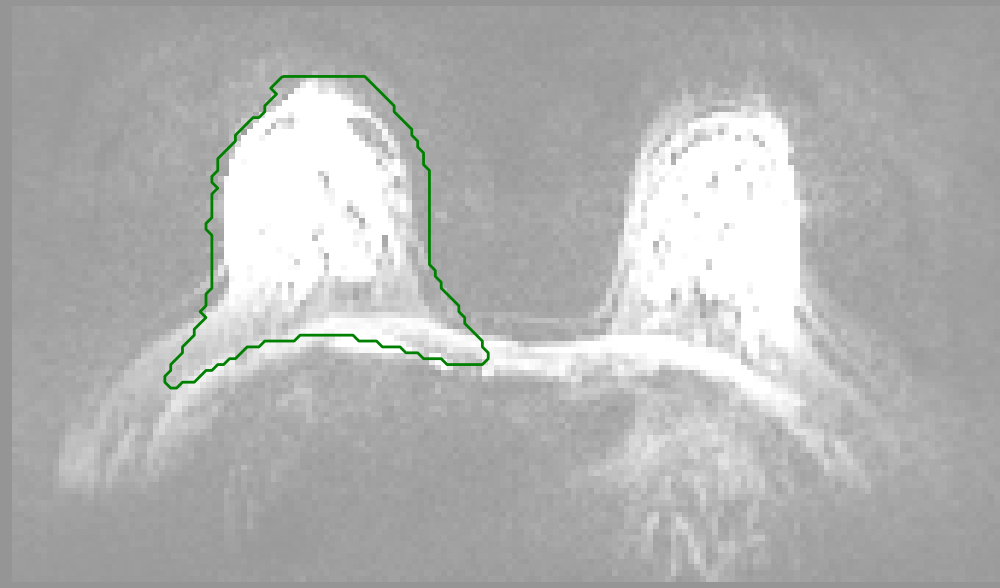

No contour levels were found within the data range.
The following kwargs were not used by contour: 'label'


In [67]:
vis = ImageVisualiser(WES_008_4_B50T, axis='z', cut=get_com(R_breast_to_0_dir), window=[-250, 500])
vis.add_contour(R_breast_to_0_dir, name='BREAST', color='g')
fig = vis.show()

In [78]:
breast_contour_dilate=sitk.BinaryDilate(R_breast_to_0_dir, (2,2,2))

You have selected a single axis and multiple slice locations, attempting to match.


<IPython.core.display.Javascript object>


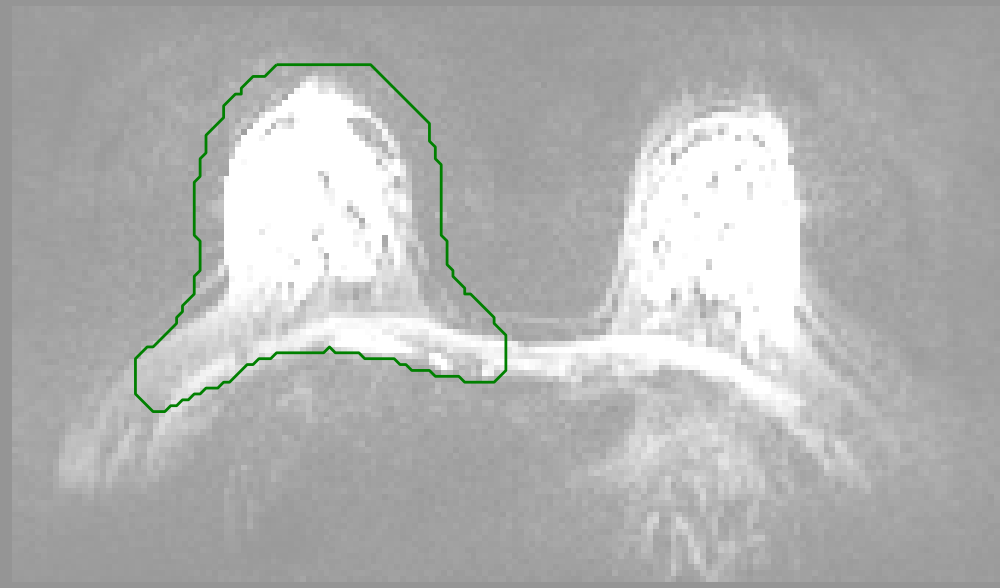

No contour levels were found within the data range.
The following kwargs were not used by contour: 'label'


In [79]:
vis = ImageVisualiser(WES_008_4_B50T, axis='z', cut=get_com(R_breast_to_0_dir), window=[-250, 500])
vis.add_contour(breast_contour_dilate, name='BREAST', color='g')
fig = vis.show()

In [80]:
masked_R_breast = sitk.Mask(WES_008_4_B50T, breast_contour_dilate)

<IPython.core.display.Javascript object>


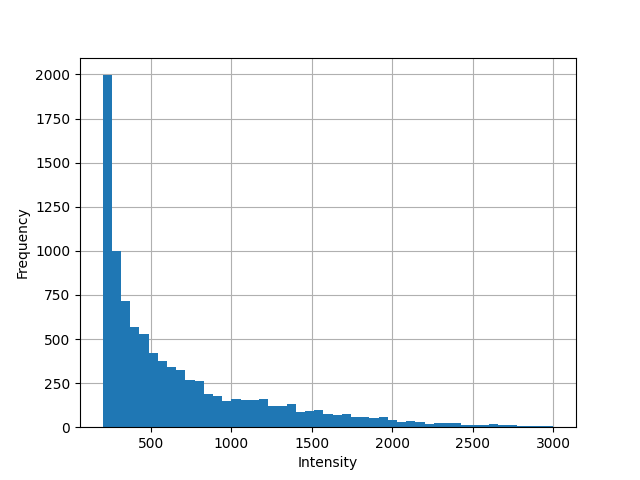

In [92]:
values = sitk.GetArrayViewFromImage(masked_R_breast).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(200,3000,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()

In [93]:
image_mri=WES_008_4_B50T
arr_mri = sitk.GetArrayFromImage(image_mri)
arr_mri[:,:,arr_mri.shape[2]//2:] = 0
image_mri_masked=sitk.GetImageFromArray(arr_mri)
image_mri_masked.CopyInformation(image_mri)

label_threshold_cc_x_f=estimate_tumour_vol(image_mri_masked, lowerthreshold=1400, upperthreshold=5000, hole_size=1)

sitk.WriteImage(label_threshold_cc_x_f,"test_label_threshold_008_4_B50T_hist.nii.gz") #good but seems to contain
#fibroglandular tissue as well

In [95]:
WES_008_4_B800T=sitk.ReadImage("/home/alicja/Documents/WES_008/IMAGES/WES_008_4_20180619_MR_EP2D_DIFF_TRA_SPAIR_ZOOMIT_EZ_B800T_EP2D_DIFF_TRA_SPAIR_ZOOMIT_TRACEW_DFC_MIX_5.nii.gz")
WES_008_4_T2w=sitk.ReadImage("/home/alicja/Documents/WES_008/IMAGES/WES_008_4_20180619_MR_T2_TSE_TRA_SPAIR_TSE2D1_11_T2_TSE_TRA_SPAIR_3.nii.gz")

<IPython.core.display.Javascript object>


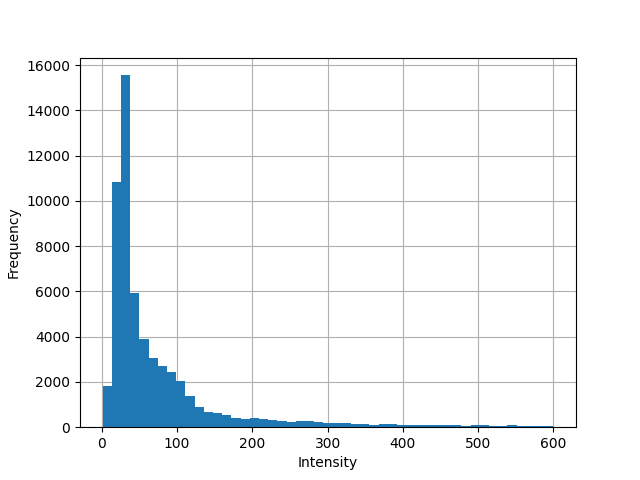

In [96]:
masked_R_breast_B800T = sitk.Mask(WES_008_4_B800T, breast_contour_dilate)
values = sitk.GetArrayViewFromImage(masked_R_breast_B800T).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(1,600,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()

In [99]:
image_mri=WES_008_4_B800T
arr_mri = sitk.GetArrayFromImage(image_mri)
arr_mri[:,:,arr_mri.shape[2]//2:] = 0
image_mri_masked=sitk.GetImageFromArray(arr_mri)
image_mri_masked.CopyInformation(image_mri)

label_threshold_cc_x_f=estimate_tumour_vol(image_mri_masked, lowerthreshold=480, upperthreshold=5000, hole_size=1)

sitk.WriteImage(label_threshold_cc_x_f,"test_label_threshold_008_4_B800T_hist.nii.gz") #good

<IPython.core.display.Javascript object>


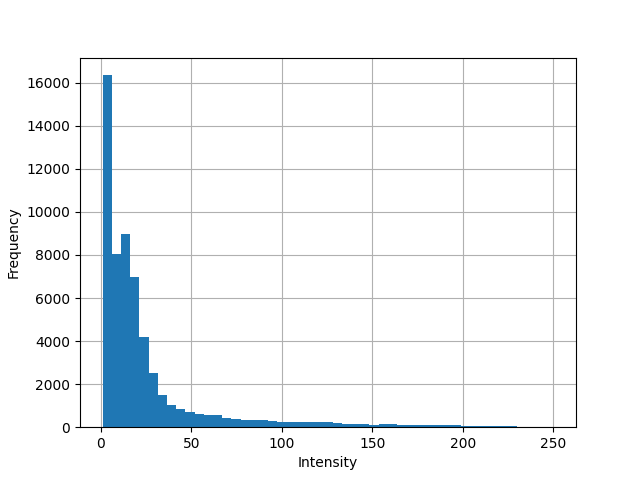

In [104]:
WES_008_4_T2w=sitk.Resample(WES_008_4_T2w,WES_008_4_B800T)

masked_R_breast_T2w = sitk.Mask(WES_008_4_T2w, breast_contour_dilate)
values = sitk.GetArrayViewFromImage(masked_R_breast_T2w).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(1,250,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()

In [105]:
image_mri=WES_008_4_T2w
arr_mri = sitk.GetArrayFromImage(image_mri)
arr_mri[:,:,arr_mri.shape[2]//2:] = 0
image_mri_masked=sitk.GetImageFromArray(arr_mri)
image_mri_masked.CopyInformation(image_mri)

label_threshold_cc_x_f=estimate_tumour_vol(image_mri_masked, lowerthreshold=197, upperthreshold=5000, hole_size=1)

sitk.WriteImage(label_threshold_cc_x_f,"test_label_threshold_008_4_T2w_hist.nii.gz") #okay but picks up
#fibroglandular tissue

In [106]:
L_breast=sitk.ReadImage("contralateral_segmentation.nii.gz")

In [107]:
L_breast_to_0_rigid = transform_propagation(
    WES_008_4_B50T,
    L_breast,
    tfm_to_0_rigid,
    structure=True
)

L_breast_to_0_dir = apply_field(
    L_breast_to_0_rigid,
    tfm_to_0_dir,
    structure=True
)

<IPython.core.display.Javascript object>


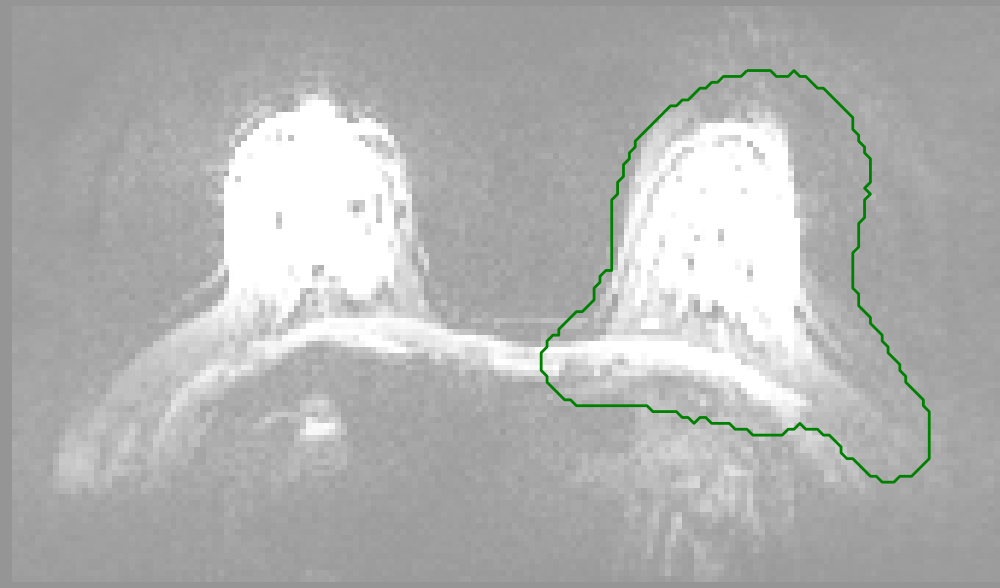

In [110]:
L_breast_contour_dilate=sitk.BinaryDilate(L_breast_to_0_dir, (4,4,4))
vis = ImageVisualiser(WES_008_4_B50T, axis='z', cut=get_com(L_breast_to_0_dir), window=[-250, 500])
vis.add_contour(L_breast_contour_dilate, name='BREAST', color='g')
fig = vis.show()

<IPython.core.display.Javascript object>


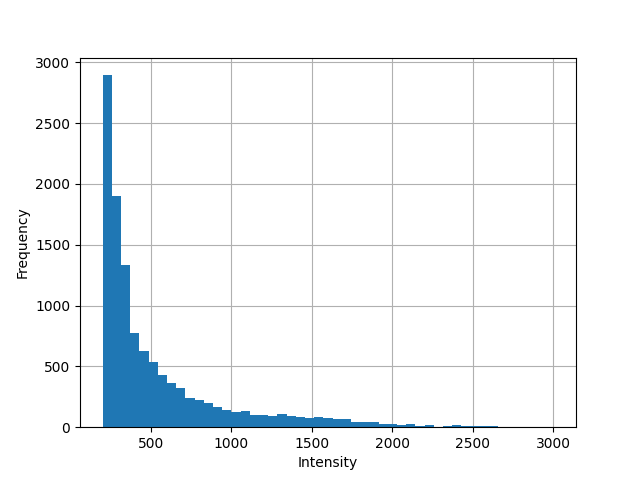

In [111]:
masked_L_breast = sitk.Mask(WES_008_4_B50T, L_breast_contour_dilate)

values = sitk.GetArrayViewFromImage(masked_L_breast).flatten()

fig, ax = plt.subplots(1,1)
ax.hist(values, bins=np.linspace(200,3000,50), histtype='stepfilled', lw=2)
#ax.set_yscale('log')
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
fig.show()